In [2]:
!python3 -m pip install --upgrade -r requirements.txt

  Using cached numpy-2.3.5-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)


In [3]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

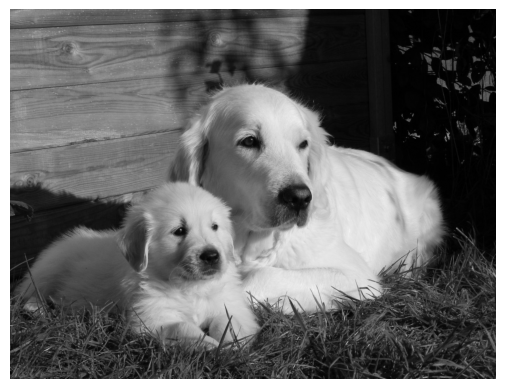

(1141, 1500)


In [4]:
#https://www.blueridgehumane.org/puppy-vs-grown-dog/
originalImage = cv2.imread(os.path.join("images", "graydog.png"))
originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
plt.imshow(originalImage, cmap='gray')
plt.axis("off")
plt.show()
print(originalImage.shape)

In [5]:
U, s, Vt = np.linalg.svd(originalImage, full_matrices=True)

/var/folders/h8/x7_s6v7j7ysb1s710mg3pslc0000gn/T/ipykernel_54738/3697871581.py:4: RuntimeWarning: divide by zero encountered in matmul
  plt.imshow(U @ sMatrix @ Vt, cmap='gray')
/var/folders/h8/x7_s6v7j7ysb1s710mg3pslc0000gn/T/ipykernel_54738/3697871581.py:4: RuntimeWarning: overflow encountered in matmul
  plt.imshow(U @ sMatrix @ Vt, cmap='gray')
/var/folders/h8/x7_s6v7j7ysb1s710mg3pslc0000gn/T/ipykernel_54738/3697871581.py:4: RuntimeWarning: invalid value encountered in matmul
  plt.imshow(U @ sMatrix @ Vt, cmap='gray')


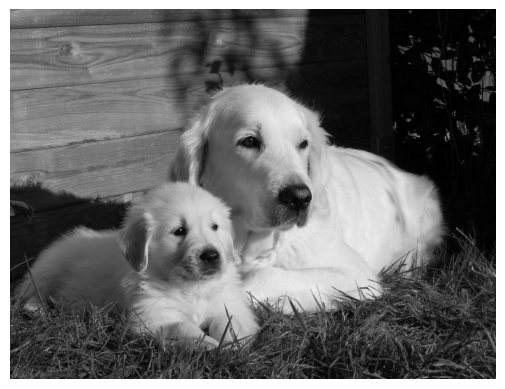

In [6]:
#verifying the SVD decomposition reproduces the original matrix
sMatrix = np.zeros((U.shape[0], Vt.shape[0]))
np.fill_diagonal(sMatrix, s)
plt.imshow(U @ sMatrix @ Vt, cmap='gray')
plt.axis("off")
plt.show()

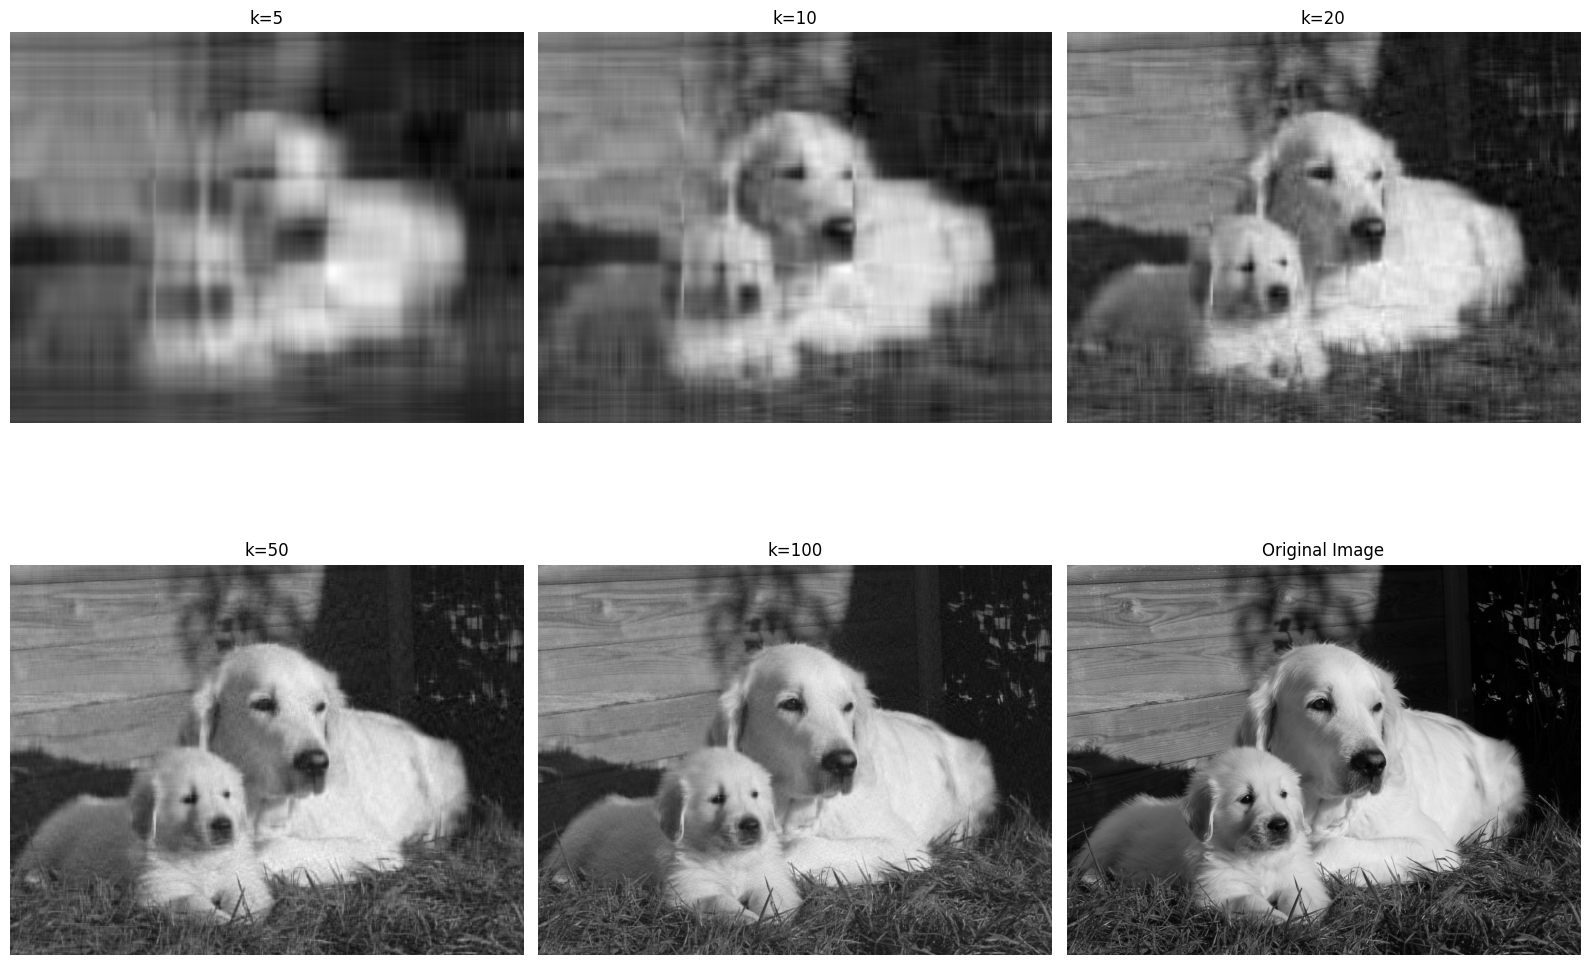

In [7]:
rows = 2
cols = 3

displaySteps = [5, 10, 20, 50, 100]
plt.figure(figsize=(8*rows, 4*cols))

approximation: np.ndarray = np.zeros((U.shape[0], Vt.shape[0]))
for k in range(displaySteps[-1]):
    approximation += s[k] * np.outer(U[:,k], Vt[k,:])
    if k + 1 in displaySteps:
        plt.subplot(rows, cols, displaySteps.index(k + 1) + 1)
        plt.imshow(approximation, cmap="gray")
        plt.title("k=" + str(k + 1))
        plt.axis('off')

plt.subplot(rows, cols, rows*cols)
plt.imshow(originalImage, cmap="gray")
plt.title("Original Image")
plt.axis('off')

plt.tight_layout()
plt.show()

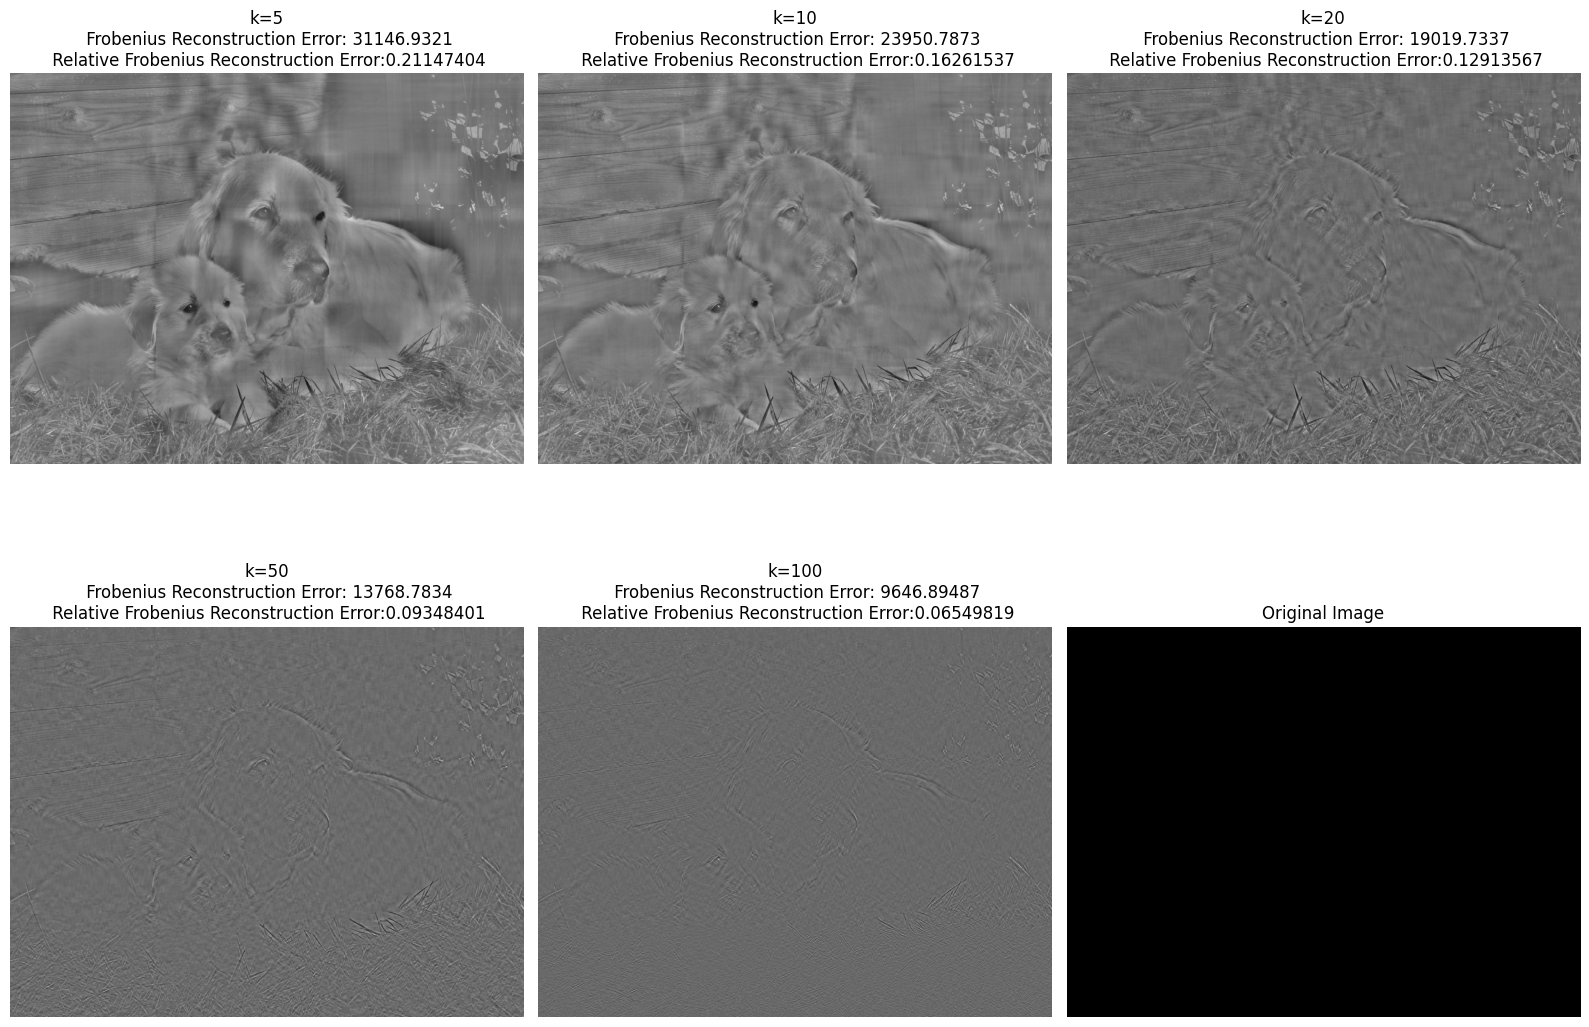

In [8]:
rows = 2
cols = 3

displaySteps = [5, 10, 20, 50, 100]
plt.figure(figsize=(8*rows, 4*cols))

approximation: np.ndarray = np.zeros((U.shape[0], Vt.shape[0]))
for k in range(displaySteps[-1]):
    approximation += s[k] * np.outer(U[:,k], Vt[k,:])
    if k + 1 in displaySteps:
        plt.subplot(rows, cols, displaySteps.index(k + 1) + 1)
        diff = originalImage - approximation
        plt.imshow(diff, cmap="gray")
        plt.title("k=" + str(k + 1) 
                  + "\n Frobenius Reconstruction Error: " + str(np.linalg.norm(diff))[:10]
                  + "\n Relative Frobenius Reconstruction Error:" + str(np.linalg.norm(diff)/np.linalg.norm(originalImage))[:10])
        plt.axis('off')

plt.subplot(rows, cols, rows*cols)
plt.imshow(originalImage - originalImage, cmap="gray")
plt.title("Original Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
#Converts to np.float32 to avoid underflow 
def relativeFrobeniusError(a: np.ndarray, b: np.ndarray) -> float:
    aF = a.astype(np.float32)
    bF = b.astype(np.float32)
    return float(np.linalg.norm(aF - bF) / np.linalg.norm(aF))

In [13]:
maxK = min(U.shape[0], Vt.shape[0])

relativeFrobeniusErr:list[float] = [0]*maxK
compressionRatio:list[float] = [0]*maxK
approximation: np.ndarray = np.zeros((U.shape[0], Vt.shape[0]))
for k in range(maxK):
    approximation += s[k] * np.outer(U[:,k], Vt[k,:])
    relativeFrobeniusErr[k] = relativeFrobeniusError(originalImage, approximation)
    compressionRatio[k] = (originalImage.nbytes - (s[:k].nbytes + U[:,:k].nbytes + Vt[:k,:].nbytes))/originalImage.nbytes

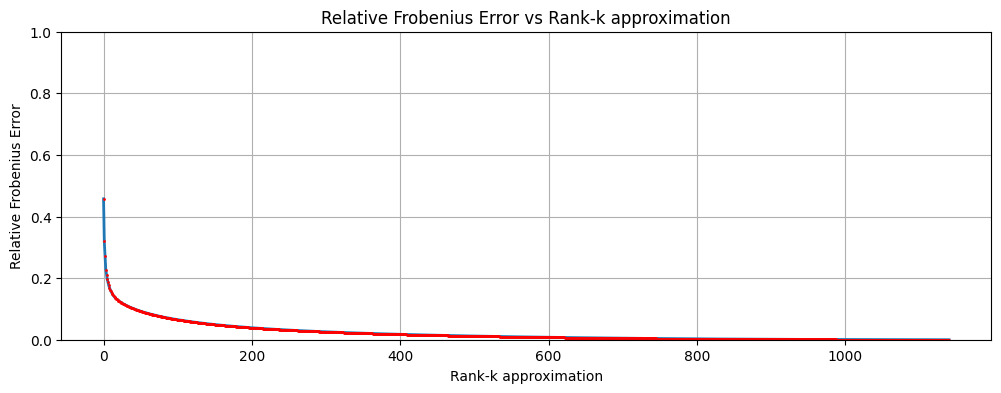

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(relativeFrobeniusErr, marker='o', markersize=1, markeredgecolor='red', linewidth=2)
plt.ylim(0, 1)
plt.xlabel("Rank-k approximation")
plt.ylabel("Relative Frobenius Error")
plt.title("Relative Frobenius Error vs Rank-k approximation")
plt.grid(True)

plt.show()

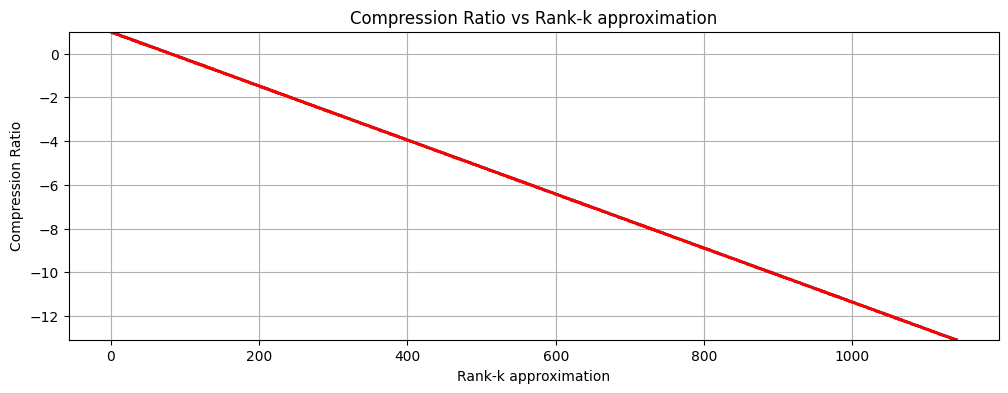

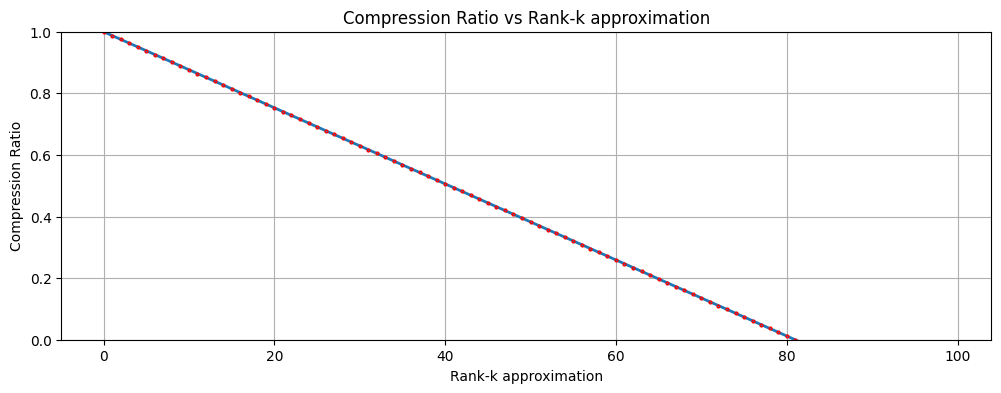

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(compressionRatio, marker='o', markersize=1, markeredgecolor='red', linewidth=2)
plt.ylim(min(compressionRatio), 1)
plt.xlabel("Rank-k approximation")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs Rank-k approximation")
plt.grid(True)

plt.show()


plt.figure(figsize=(12, 4))
plt.plot(compressionRatio[:100], marker='o', markersize=2, markeredgecolor='red', linewidth=2)
plt.ylim(0, 1)
plt.xlabel("Rank-k approximation")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs Rank-k approximation")
plt.grid(True)

plt.show()

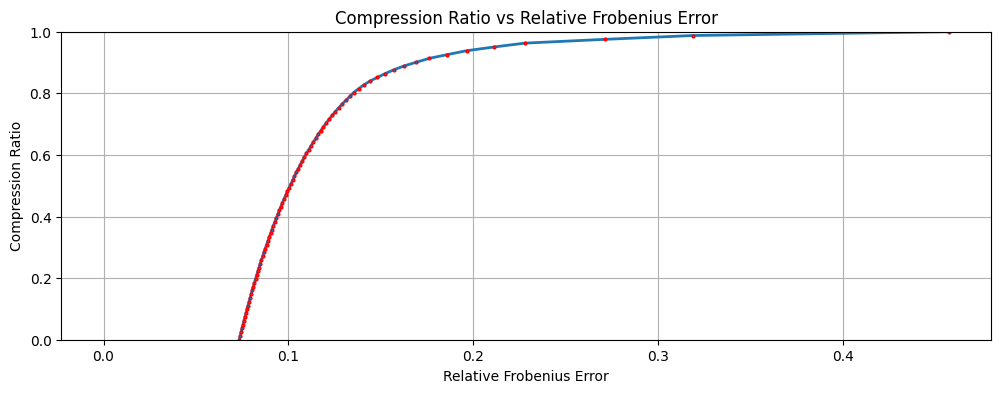

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(relativeFrobeniusErr, compressionRatio, label = "WEBP",  marker='o', markersize=2, markeredgecolor='red', linewidth=2)

plt.ylim(0, 1)
plt.xlabel("Relative Frobenius Error")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs Relative Frobenius Error")
plt.grid(True)

plt.show()